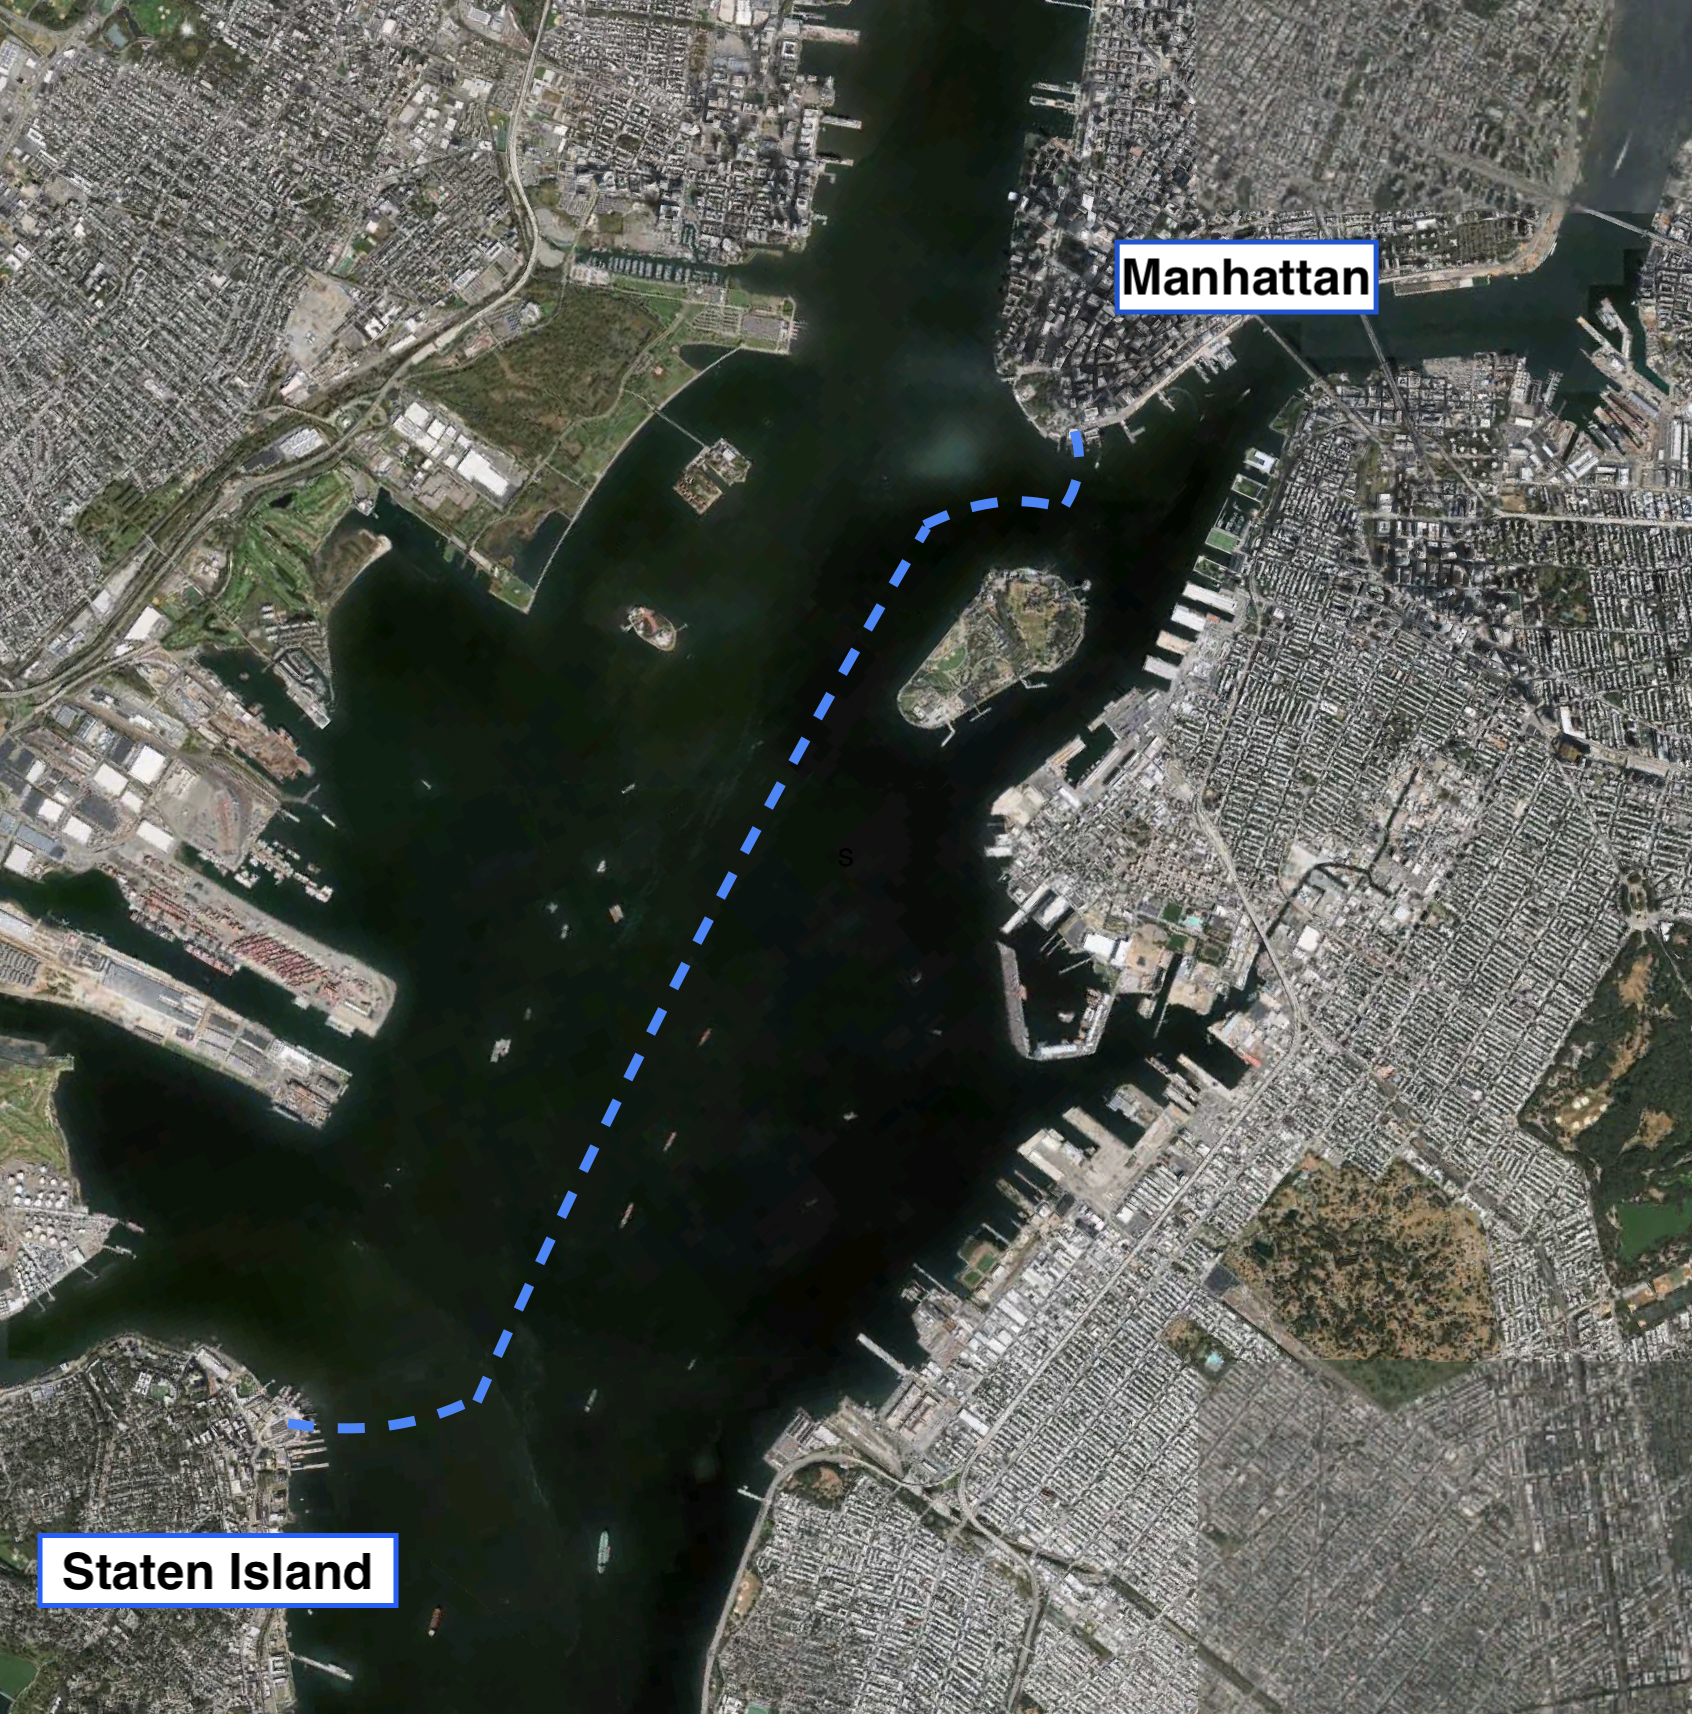

In [61]:
from IPython.display import Image
Image('/content/MapWithRoute_Initial.png',width = 500,height = 500)

# Staten Island Ferry Ridership Data Project

For this project we will analyziing the Staten Island Ridership dataset from the NYC Open Data website. The dataset can be found at the url:
https://data.cityofnewyork.us/Transportation/Staten-Island-Ferry-Ridership-Counts/6eng-46dm/about_data.

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


### The Data

Our dataset is from the NYC Open Data Website. The data comes in the form of a csv. According tto the data dictionary, this dataset has three columns, the date, the total number of riders departing Staten Island each day, and the total number of riders departing Manhattan each day.

The Url: https://data.cityofnewyork.us/Transportation/Staten-Island-Ferry-Ridership-Counts/6eng-46dm/about_data

In [63]:
file_path = '/content/Staten_Island_Ferry_Ridership_Counts_20240628.csv'
data = pd.read_csv(file_path)

In [64]:
data.head()

Date  Whitehall Terminal  St. George Terminal
0  01/01/2019               27101                23385
1  01/02/2019               39425                39746
2  01/03/2019               39430                37988
3  01/04/2019               37593                39140
4  01/05/2019               19537                17925

In [65]:
df = data.copy()

In [66]:
#check for missing values in each column.
df.isnull().sum()

Date                   0
Whitehall Terminal     0
St. George Terminal    0
dtype: int64

No missing values.

In [67]:
df.shape

(1992, 3)

In [68]:
#Checking that all values in Date column are unique.
df['Date'].nunique() - df['Date'].shape[0]

0

In [69]:
#Converting dates to pandas datetime.

df['date'] = pd.to_datetime(df['Date'])
df = df.drop('Date' , axis = 1)

In [70]:
df.head()

Whitehall Terminal  St. George Terminal       date
0               27101                23385 2019-01-01
1               39425                39746 2019-01-02
2               39430                37988 2019-01-03
3               37593                39140 2019-01-04
4               19537                17925 2019-01-05

Checking correct order:

In [71]:
(df['date'].sort_values()  != df['date']).sum()

0

The sum of the boolean dataframe outputed from applying the not-equals operation means there is no row where the dates differ fro m the sorted the dates.

In [72]:
print(df['date'].min())
print(df['date'].max())

2019-01-01 00:00:00
2024-06-16 00:00:00


In [73]:
d = pd.date_range(df['date'].min(),df['date'].max(),freq = 'd')
d.difference(df['date'])

DatetimeIndex(['2020-02-22', '2020-02-23'], dtype='datetime64[ns]', freq=None)

We see that two dates are missing from our date time index: ['2020-02-22', '2020-02-23'].

We can visualize our data.

Now that we understand our date values for our time series better, we can set the dataframe index to a pandas datetime index using the date column, and while we are at it, we can create a time dummy variable.

In [74]:
df.head()

Whitehall Terminal  St. George Terminal       date
0               27101                23385 2019-01-01
1               39425                39746 2019-01-02
2               39430                37988 2019-01-03
3               37593                39140 2019-01-04
4               19537                17925 2019-01-05

In [75]:
df['dummy'] = df.index

In [76]:
df.head()

Whitehall Terminal  St. George Terminal       date  dummy
0               27101                23385 2019-01-01      0
1               39425                39746 2019-01-02      1
2               39430                37988 2019-01-03      2
3               37593                39140 2019-01-04      3
4               19537                17925 2019-01-05      4

In [77]:
df.index = df['date']
df = df.drop('date',axis = 1)

In [78]:
df.head()

Whitehall Terminal  St. George Terminal  dummy
date                                                      
2019-01-01               27101                23385      0
2019-01-02               39425                39746      1
2019-01-03               39430                37988      2
2019-01-04               37593                39140      3
2019-01-05               19537                17925      4

In [79]:
df.index.year.unique()

Index([2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='date')

In [80]:
df.index.year.nunique()

6

We will give our columns simpler names. We will change 'Whitehall Terminal' to 'dep_mn' and change 'St. George Terminal' to 'dep_si'.

In [81]:
df.columns

Index(['Whitehall Terminal', 'St. George Terminal', 'dummy'], dtype='object')

In [82]:
df = df.rename(columns = {'Whitehall Terminal':'dep_mn' ,'St. George Terminal' : 'dep_si'  })

In [83]:
df.head()

dep_mn  dep_si  dummy
date                             
2019-01-01   27101   23385      0
2019-01-02   39425   39746      1
2019-01-03   39430   37988      2
2019-01-04   37593   39140      3
2019-01-05   19537   17925      4

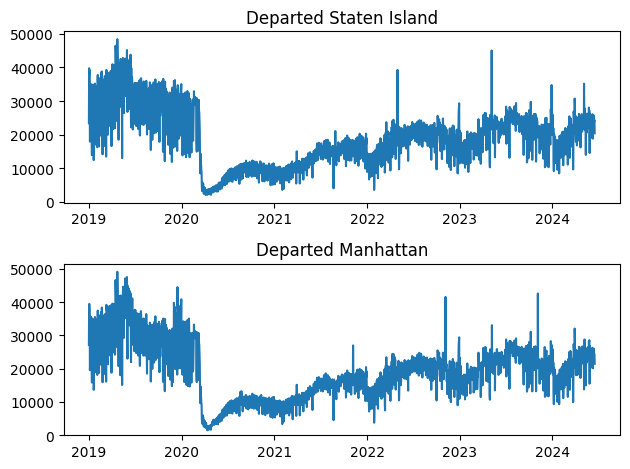

In [84]:
fig, axs = plt.subplots(2)
axs[0].plot(df['dep_si'])
axs[1].plot(df['dep_mn'])

axs[0].set_title('Departed Staten Island')

axs[1].set_title('Departed Manhattan')

fig.tight_layout()

plt.ylim(bottom = 0)
plt.show()

We can create a total number of departures each day column

In [85]:
df['total'] = df['dep_si'] + df['dep_mn']

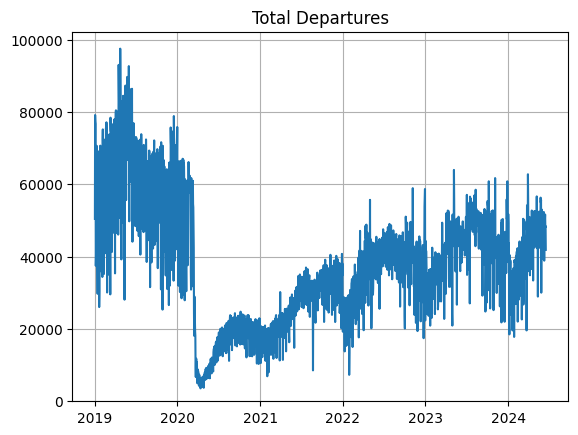

In [86]:
plt.plot(df['total'])

plt.title('Total Departures')

plt.ylim(bottom = 0)

plt.grid()
plt.show()


We see a sudden change in 2020. Let's zoom in to see better.

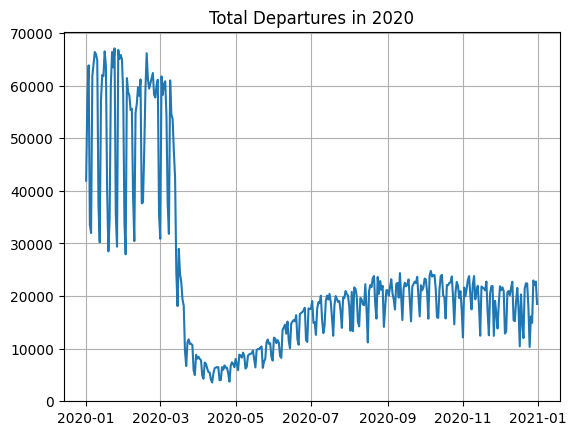

In [87]:
def plot_2020():
  mask = df.index.year == 2020

  plt.plot(df['total'][mask])

  plt.title('Total Departures in 2020')

  plt.ylim(bottom = 0)

  plt.grid()
  plt.show()
plot_2020()

We see a drop in ridership around when covid lockdowns began.

Because of this drop, we will pslit or data into pre covid and post covid sections.

To isolate the post covid structure from the pre covid structure, we will leave out the year 2020 from both sections.

In [88]:
def add_post_column():
  mask = df.index.year > 2020

  #The code 1 will be for the post covid section.
  df.loc[mask,'post'] = 1

  #The code 2 will be for the section we will be leaving out from both the pre covid and post covid sections.

  mask = df.index.year == 2020
  df.loc[mask,'post'] = 2


  #The code 0 will be for the pre covid section.
  mask = df.index.year < 2020
  df.loc[mask,'post'] = 0

  df['post'] = df['post'].astype(int)

add_post_column()


In [89]:
df.head()

dep_mn  dep_si  dummy  total  post
date                                          
2019-01-01   27101   23385      0  50486     0
2019-01-02   39425   39746      1  79171     0
2019-01-03   39430   37988      2  77418     0
2019-01-04   37593   39140      3  76733     0
2019-01-05   19537   17925      4  37462     0

In [90]:
df['post'].unique()

array([0, 2, 1])

In [91]:
df['post'].value_counts()

post
1    1263
0     365
2     364
Name: count, dtype: int64

So we have 365 data points for before covid, and 1263 for after.

In [92]:
df['post'].value_counts()/365

post
1    3.460274
0    1.000000
2    0.997260
Name: count, dtype: float64

Or one year before covid, and about 3.5 for after.

We can plot the before covid and after covid data

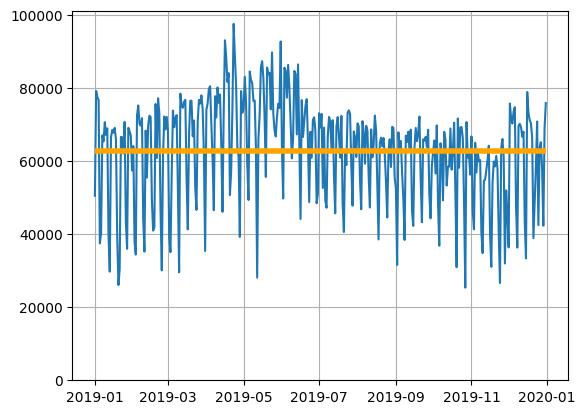

mean of pre covid section:  62836.56


In [93]:
mask = df['post'] == 0
m = df['total'][mask].mean()
mean_pre = m
plt.plot(df['total'][mask])
plt.hlines(m , xmin = df.index.min(), xmax = df.index[mask].max(),color = 'orange',linewidth = 4)
plt.ylim(bottom = 0)

plt.grid()
plt.show()

print('mean of pre covid section: ', np.round(m,2))

Assumiong the ridership structure of the data hasn't changed for a long time before covid, we can use the data for 2019 to describe how many riders there were before covid.

So before covid we had just over 60 thousand departures each day on average.

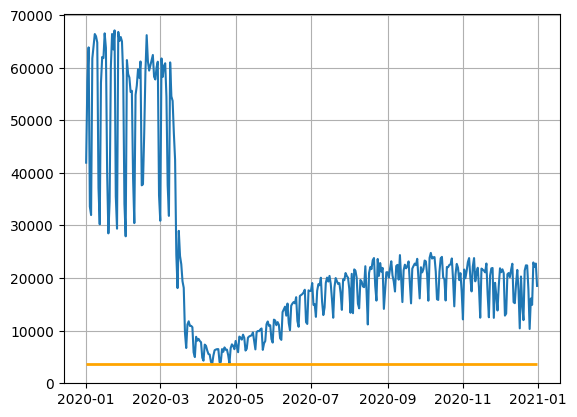

Minimum of transition section:  3572
Minimum occurs on the date:  2020-04-12 00:00:00


In [94]:
mask = df['post'] == 2
m = df['total'][mask].min()
plt.plot(df['total'][mask])
plt.hlines(m , xmin = df[mask].index.min(), xmax = df.index[mask].max(),color = 'orange',linewidth = 2)


plt.ylim(bottom = 0)




plt.grid()
plt.show()


date_min = df[mask].loc[df['total'][mask] ==  m ].index[0]

print('Minimum of transition section: ', np.round(m,2))
print('Minimum occurs on the date: ', date_min)


So our ridership dropped to 3500

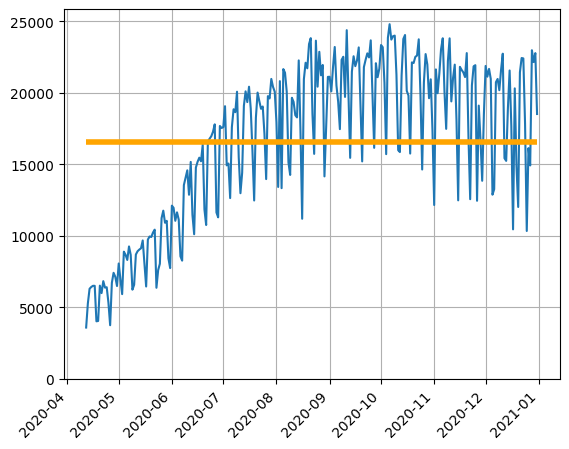

mean of after drop post covid section:  16557.458333333332


In [95]:
mask = df['post'] == 2


m = df['total'][mask].min()
date_min = df[mask].loc[df['total'][mask] ==  m ].index[0]



mask = mask & (df.index >= date_min)

post_mean = df['total'][mask].mean()

plt.plot(df['total'][mask])
plt.hlines(post_mean , xmin = df[mask].index.min(), xmax = df.index[mask].max(),color = 'orange',linewidth = 4)


plt.ylim(bottom = 0)
plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()

print('mean of after drop post covid section: ' , post_mean)

Our average departures for after the drop for 2020 is just above 16 thousand.

In [96]:
mean_pre - m

59264.55616438356

We had around a 60 thousand departure count drop around covid, by using the average of the pre covid data to represent the pre ridership numbers.

### Post Covid Structure

We will focus mostly on the post covid structure. We will answer a few questions.

1. What is the trend of the post covid data?
2. Is there an effect due to the day of the week?
3. Is there an effect due to month of the year?



We can clearly see a positive trend in the post covid data, and we can see seasonality.

### Time Series Decomposition

We will decompose our data $X_t$ into 4 different components:

$$ X_t = T_t + S_t + \varepsilon_t$$

where

$$S_t = M_t + W_t$$

the weekly seasonal componet and the monthly seasonal component.

$$ X_t = T_t + (M_t + W_t) + \varepsilon_t$$

### Trend

To isolate the trend we will use a 365 day moving average.

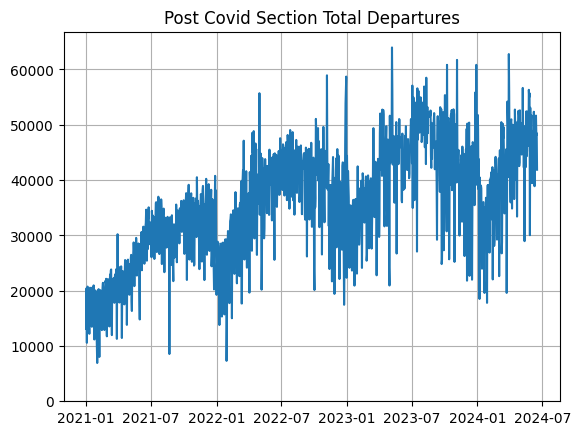

In [97]:
mask = df['post'] == 1
plt.plot(df['total'][mask])


plt.title('Post Covid Section Total Departures')

plt.ylim(bottom = 0)

plt.grid()
plt.show()

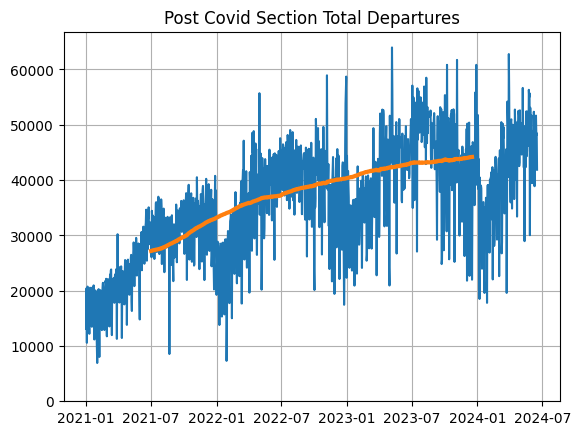

In [98]:
mask = df['post'] == 1

plt.plot(df['total'][mask])

plt.plot(df['total'][mask].rolling(365,center = True).mean(),linewidth = 3)


plt.title('Post Covid Section Total Departures')

plt.ylim(bottom = 0)

plt.grid()
plt.show()

In [99]:
post_mask = df['post'] == 1

In [100]:
T = df[post_mask]['total'].rolling(365,center = True).mean()

df.loc[post_mask, 'T'] = T

df.loc[ post_mask, 'S+I'] = df.loc[post_mask, 'total'] - T

### Seasonality

To see some of the details of the series better, we can decrease the time granularity by grouping the data by month.

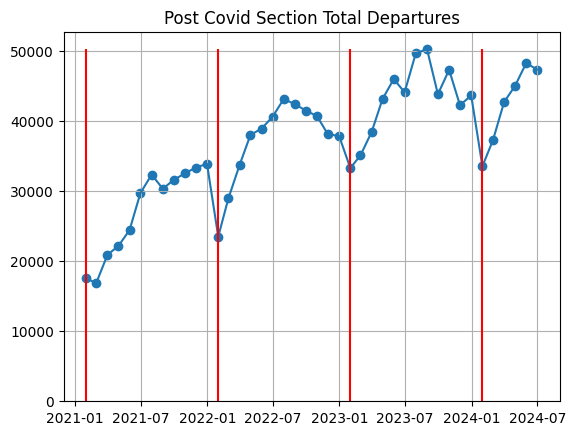

In [40]:
mask = df['post'] == 1

s = df['total'][mask].resample('m').mean()

plt.plot(s.index , s)
plt.scatter(s.index , s)


A = s.index[s.index.month == 1]

plt.vlines(A,ymin = 0,ymax = s.max(),color = 'red')


plt.title('Post Covid Section Total Departures')

plt.ylim(bottom = 0)

plt.grid()
plt.show()

This plot shows a seasonal pattern over each year with respect to months.

In [44]:
post_mask = df['post'] == 1

In [45]:
T = df[post_mask]['total'].rolling(365,center = True).mean()

df.loc[post_mask, 'T'] = T

df.loc[ post_mask, 'S+I'] = df.loc[post_mask, 'total'] - T

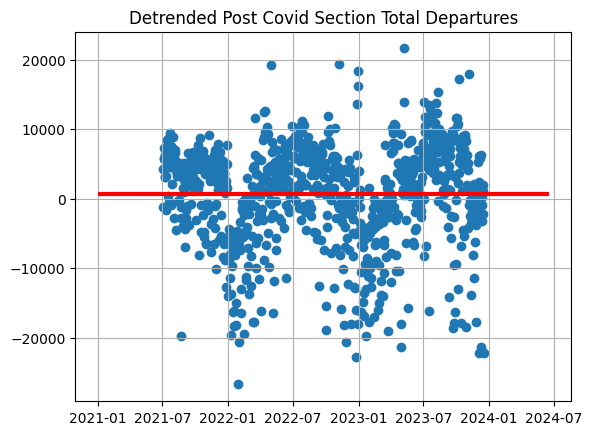

In [46]:
SI = df[post_mask]['S+I']

plt.scatter(SI.index , SI)

# plt.plot(df['total'][mask].rolling(365,center = True).mean(),linewidth = 3)


plt.hlines(SI.mean(),xmin = SI.index.min(),xmax = SI.index.max(),linewidth = 3,color = 'red')


# plt.hlines(0,xmin = T.index.min(),xmax = T.index.max(),linewidth = 3,color = 'red')

plt.title('Detrended Post Covid Section Total Departures')

# plt.ylim(bottom = 0)


# plt.vlines(A,ymin = 0,ymax = s.max(),color = 'red')

plt.grid()
plt.show()

The next goal will be to isolate weekly seasonality.

In [58]:
df[post_mask].head()

dep_mn  dep_si  dummy  total  post   T  S+I
date                                                   
2021-01-01    6846    6240    729  13086     1 NaN  NaN
2021-01-02   10257   10175    730  20432     1 NaN  NaN
2021-01-03    5360    5208    731  10568     1 NaN  NaN
2021-01-04   10221   10218    732  20439     1 NaN  NaN
2021-01-05   10445   10300    733  20745     1 NaN  NaN

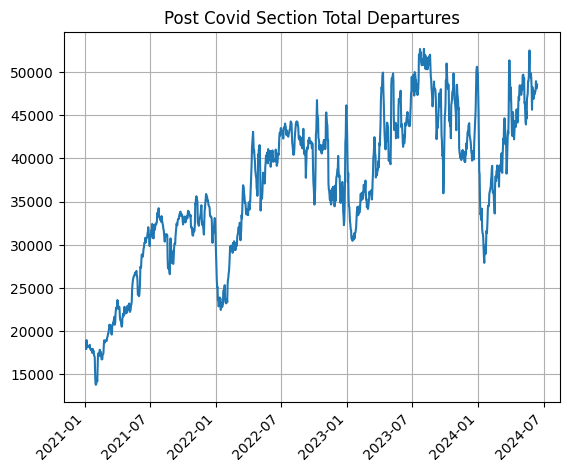

In [103]:
mask = df['post'] == 1


s = df['total'][mask].rolling(7,center = True).mean()

plt.plot(s)


plt.title('Post Covid Section Total Departures')

# plt.ylim(bottom = 0)

plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()

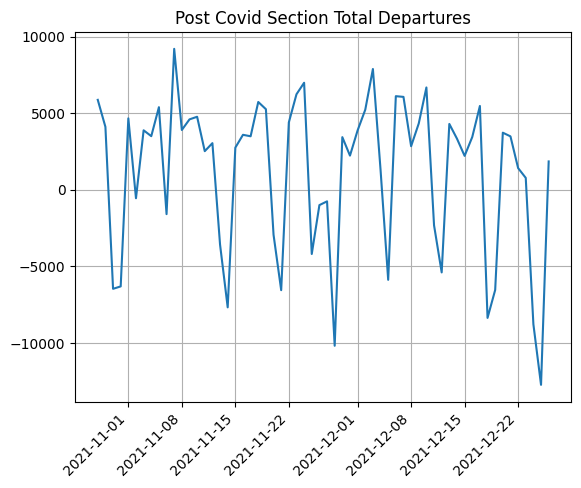

In [129]:
mask = df['post'] == 1


s = df['total'][mask].rolling(365,center = True).mean()


y = df['total'][mask] - s




plt.plot(y[300:360])


plt.title('Post Covid Section Total Departures')

# plt.ylim(bottom = 0)

plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()

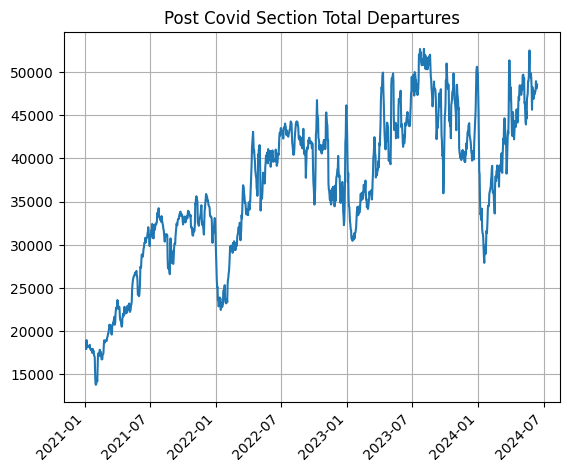

In [56]:
mask = df['post'] == 1


s = df['total'][mask].rolling(7,center = True).mean()

# w = df[mask]['total'] - s



# A = w.index[start:end][w.index.weekday[start:end] == 6]

# plt.vlines(A,color = 'r',ymin = w.min(), ymax = w.max())

# plt.plot(df['total'][mask])

plt.plot(s)


plt.title('Post Covid Section Total Departures')

# plt.ylim(bottom = 0)

plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()

In [48]:
df.index.weekday

Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       ...
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
      dtype='int32', name='date', length=1992)

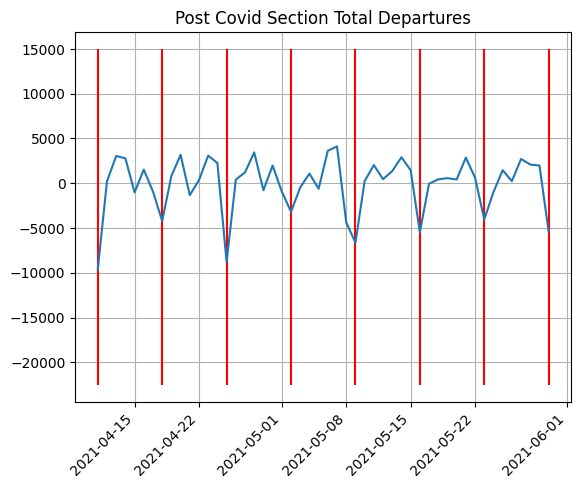

In [51]:
#temporary code

def week_plot(start,end):

  mask = df['post'] == 1


  s = df['total'][mask].rolling(7,center = True).mean()

  w = df[mask]['total'] - s



  A = w.index[start:end][w.index.weekday[start:end] == 6]

  plt.vlines(A,color = 'r',ymin = w.min(), ymax = w.max())

  # plt.plot(df['total'][mask])

  plt.plot(w[start:end])


  plt.title('Post Covid Section Total Departures')

  # plt.ylim(bottom = 0)

  plt.xticks(rotation=45, ha='right')

  plt.grid()
  plt.show()

week_plot(100,150)

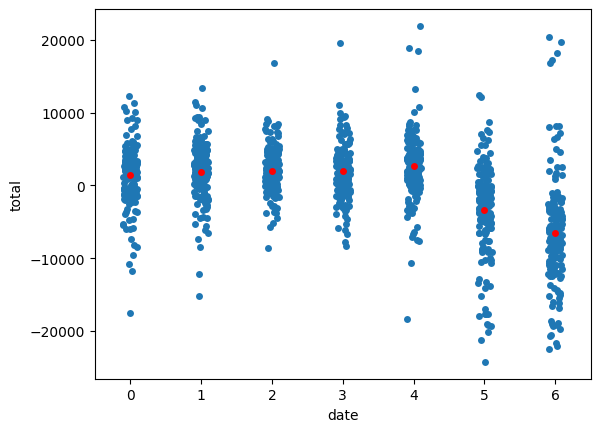

In [ ]:
#temporary code

mask = df['post'] == 1


s = df['total'][mask].rolling(30,center = True).mean()

w = df[mask]['total'] - s


sns.stripplot(df[post_mask] , x = df[post_mask].index.weekday, y = w)
sns.stripplot(x = df[post_mask].index.weekday.unique().sort_values(),y = w.groupby(df[post_mask].index.weekday).mean(),color = 'red')


plt.show()

In [ ]:
b

### Average seaonal effect.

In [ ]:
df['month'] = df.index.month

In [ ]:
df['weekday_code'] = df.index.weekday

In [ ]:
df.head()

dep_mn  dep_si  dummy  total  post   T  S+I  month  weekday_code
date                                                                        
2019-01-01   27101   23385      0  50486     0 NaN  NaN      1             1
2019-01-02   39425   39746      1  79171     0 NaN  NaN      1             2
2019-01-03   39430   37988      2  77418     0 NaN  NaN      1             3
2019-01-04   37593   39140      3  76733     0 NaN  NaN      1             4
2019-01-05   19537   17925      4  37462     0 NaN  NaN      1             5

In [ ]:
df[post_mask]['S+I'].groupby(df[post_mask].index.month).mean()

date
1    -8753.367388
2    -5893.331996
3    -2536.161688
4     1447.875160
5     2812.543659
6     2378.678037
7     5650.830107
8     4378.757490
9     1805.789924
10    2374.498011
11    -550.732268
12   -1014.370453
Name: S+I, dtype: float64

In [ ]:
df[post_mask].index.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='date')

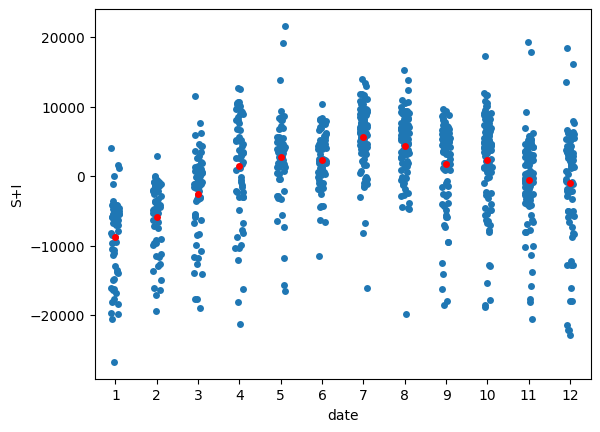

In [ ]:


sns.stripplot(df[post_mask] , x = df[post_mask].index.month, y = df[post_mask]['S+I'])
sns.stripplot(x = df[post_mask].index.month.unique(),y = df[post_mask]['S+I'].groupby(df[post_mask].index.month).mean(),color = 'red')


plt.show()

In [ ]:
SI = df[post_mask]['S+I']

plt.scatter(SI.index , SI)

# plt.plot(df['total'][mask].rolling(365,center = True).mean(),linewidth = 3)


plt.hlines(SI.mean(),xmin = SI.index.min(),xmax = SI.index.max(),linewidth = 3,color = 'red')


# plt.hlines(0,xmin = T.index.min(),xmax = T.index.max(),linewidth = 3,color = 'red')

plt.title('Detrended Post Covid Section Total Departures')

# plt.ylim(bottom = 0)

plt.grid()
plt.show()